In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# 1. Demonstrate POS tagging using NLTK POS tagger, textblob POS tagger and the Regular Expression tagger and report the output. (5 marks)


# Read data from text file
with open('/content/drive/MyDrive/Colab Notebooks/TXSA/Assignment Data/Data_2.txt', 'r') as file:
    text = file.read()

# Import necessary libraries
from nltk import pos_tag, RegexpTagger, word_tokenize
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenize the text
tokens = word_tokenize(text)

# Perform POS tagging using NLTK POS tagger
nltk_pos_tags = pos_tag(tokens)

# Perform POS tagging using TextBlob POS tagger
blob = TextBlob(text)
textblob_pos_tags = [(word, tag) for word, tag in blob.tags]

# Define a regular expression tagger
patterns = [
    (r'.*ing$', 'VBG'),            # gerunds
    (r'.*ed$', 'VBD'),             # simple past
    (r'.*es$', 'VBZ'),             # 3rd singular present
    (r'.*ould$', 'MD'),            # modals
    (r'.*\'s$', 'NN$'),            # possessive nouns
    (r'.*s$', 'NNS'),              # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                  # nouns (default)
]
regexp_tagger = RegexpTagger(patterns)

# Perform POS tagging using the regular expression tagger
regexp_pos_tags = regexp_tagger.tag(tokens)

# Print the POS tagging results
print("NLTK POS Tags:")
print(nltk_pos_tags)
print("\nTextBlob POS Tags:")
print(textblob_pos_tags)
print("\nRegular Expression Tagger POS Tags:")
print(regexp_pos_tags)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


NLTK POS Tags:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]

TextBlob POS Tags:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]

Regular Expression Tagger POS Tags:
[('The', 'NN'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'NN'), ('the', 'NN'), ('white', 'NN'), ('cat', 'NN'), ('and', 'NN'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.1 MB/s eta 0:00:00


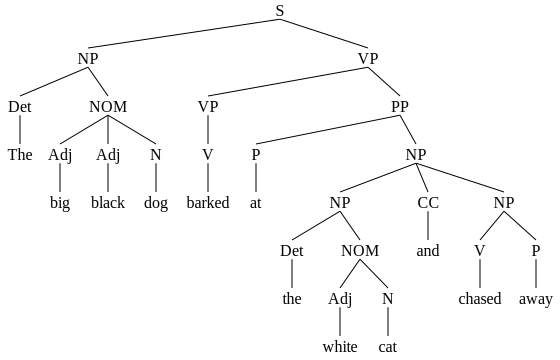

In [21]:
import nltk
from IPython.display import display
!pip install svgling

# Define the sentence
sentence = "The big black dog barked at the white cat and chased away"

# Define the context-free grammar (CFG)
grammar = nltk.CFG.fromstring("""
S -> NP VP | S CC S
NP -> Det NOM | Det N | NP CC NP | N | V P | PP NP | Det N PP
NOM -> Adj NOM | Adj N | Adj Adj N | N
VP -> V NP | VP PP | V | V NP PP | VP CC VP | Adj VP | VP Adj | V Adj
PP -> P NP
V -> 'barked' | 'chased'
Det -> 'the' | 'The'
CC -> 'and'
N -> 'dog' | 'cat' | N CC N
Adj -> 'big' | 'black' | 'white'
P -> 'at' | 'away'
""")

# Tokenize the sentence
tokens = nltk.tokenize.word_tokenize(sentence)

# Create a parser based on the CFG
parser = nltk.ChartParser(grammar)

# Parse the sentence and display the first parse tree
parse_tree = next(parser.parse(tokens))
display(parse_tree)
